In [7]:
from DL_stock_prediction import LoadData

ImportError: cannot import name 'LoadData' from 'DL_stock_prediction' (unknown location)

In [ ]:
import yfinance as yf

# Define the stock symbol (e.g., Apple)
stock_symbol = "AAPL"

# Download historical stock data (5 years)a)

# Keep only important columns
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]
stock_data.columns = [col[0] for col in stock_data.columns]
stock_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02,248.656607,248.826433,241.554430,243.582199,55740700
2025-01-03,243.092728,243.911819,241.624341,243.092728,40244100
2025-01-06,244.041682,247.058369,242.932900,244.730927,45045600
2025-01-07,242.713144,245.280328,241.084944,241.944000,40856000
2025-01-08,241.654299,243.442342,239.786358,242.433441,37628900


In [ ]:
import requests

API_KEY =  # Get from https://newsapi.org/

url = f"https://newsapi.org/v2/everything?q=apple&from=2025-02-06&sortBy=publishedAt&apiKey={API_KEY}"
response = requests.get(url)
news_data = response.json()

# Extract headlines and publication dates
headlines = [(article["title"], article["publishedAt"]) for article in news_data["articles"]]

# Convert to DataFrame
import pandas as pd
news_df = pd.DataFrame(headlines, columns=['headline', 'date'])
news_df.head()


KeyError: 'articles'

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # Overall sentiment score

# Apply sentiment analysis
news_df["sentiment"] = news_df["headline"].apply(get_sentiment)
news_df.head(20)



,headline,date,sentiment
0,Внутренние и внешние украинцы Александра Дугин...,2025-03-05T09:45:54Z,0.0000
1,Названы цены новых iPad в России,2025-03-05T09:45:36Z,0.0000
2,How to Keep Apple iCloud Private in the UK Wit...,2025-03-05T09:43:06Z,-0.1877
3,El discurso íntegro de Donald Trump en el Capi...,2025-03-05T09:42:39Z,0.0000
4,Najlepszy iPad w kapitalnej cenie. Bierz go za...,2025-03-05T09:41:18Z,0.0000
5,Почему видеокарты и процессоры продолжат дорож...,2025-03-05T09:40:43Z,0.0000
6,営業名刺管理「SKYPCE Ver.4」を発売、充実の企業データベース、人事異動情報で営業活...,2025-03-05T09:40:01Z,0.0000
7,営業名刺管理「SKYPCE Ver.4」を発売、充実の企業データベース、人事異動情報で営業活...,2025-03-05T09:40:01Z,0.0000
8,Arbetssökande ska inte längre kallas för kunder,2025-03-05T09:40:00Z,0.0000
9,Enjoy ultra-long battery life for less with th...,2025-03-05T09:38:44Z,0.5994


In [4]:
from transformers import pipeline
import tf_keras


# Load FinBERT sentiment model
finbert = pipeline("sentiment-analysis", model="ProsusAI/finbert")

# Function to get sentiment
def get_finbert_sentiment(text):
    result = finbert(text)[0]
    sentiment = 1 if result["label"] == "positive" else (-1 if result["label"] == "negative" else 0)
    return sentiment

# Apply to news headlines
news_df["finbert_sentiment"] = news_df["headline"].apply(get_finbert_sentiment)
news_df.head()


C:\Users\bvano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use 0


,headline,date,sentiment,finbert_sentiment
0,Внутренние и внешние украинцы Александра Дугин...,2025-03-05T09:45:54Z,0.0000,1
1,Названы цены новых iPad в России,2025-03-05T09:45:36Z,0.0000,1
2,How to Keep Apple iCloud Private in the UK Wit...,2025-03-05T09:43:06Z,-0.1877,1
3,El discurso íntegro de Donald Trump en el Capi...,2025-03-05T09:42:39Z,0.0000,1
4,Najlepszy iPad w kapitalnej cenie. Bierz go za...,2025-03-05T09:41:18Z,0.0000,1


In [4]:
news_data

{'status': 'error',
 'code': 'parameterInvalid',
 'message': 'You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2025-02-05, but you have requested 2025-02-05. You may need to upgrade to a paid plan.'}

In [5]:
# Ensure date formats are correct
stock_data['date'] = pd.to_datetime(stock_data.reset_index()['Date']).dt.date
news_df['date'] = pd.to_datetime(news_df['date']).dt.date
news_df
# Aggregate news to avoid duplication (optional)
# news_df_agg = news_df.groupby('date').agg({'sentiment': 'mean', 'finbert_sentiment': 'mean'}).reset_index()

# Merge datasets
merged_df = pd.merge(stock_data, news_df, on='date', how='left')
merged_df
# # Fill missing sentiment values
# merged_df['sentiment'].fillna(0, inplace=True)
# merged_df['finbert_sentiment'].fillna(0, inplace=True)
# merged_df["date"] = stock_data.reset_index()["Date"]
# print(merged_df)


,Open,High,Low,Close,Volume,date,headline,sentiment,finbert_sentiment
0,248.656607,248.826433,241.554430,243.582199,55740700,NaN,NaN,NaN,NaN
1,243.092728,243.911819,241.624341,243.092728,40244100,NaN,NaN,NaN,NaN
2,244.041682,247.058369,242.932900,244.730927,45045600,NaN,NaN,NaN,NaN
3,242.713144,245.280328,241.084944,241.944000,40856000,NaN,NaN,NaN,NaN
4,241.654299,243.442342,239.786358,242.433441,37628900,NaN,NaN,NaN,NaN
5,239.746392,239.896236,232.744097,236.589874,61710900,NaN,NaN,NaN,NaN
6,233.273523,234.412271,229.467710,234.142563,49630700,NaN,NaN,NaN,NaN
7,234.492175,235.860666,232.214681,233.023788,39435300,NaN,NaN,NaN,NaN
8,234.382301,238.697564,234.172525,237.608749,39832000,NaN,NaN,NaN,NaN
9,237.089336,237.748600,227.779565,228.009308,71759100,NaN,NaN,NaN,NaN


In [6]:
merged_df["prev_Open"] = merged_df["Open"].shift(1)
merged_df = merged_df.dropna(subset=["prev_Open"])  # Remove NaN rows
merged_df


,Open,High,Low,Close,Volume,date,sentiment,finbert_sentiment,prev_Open
1,243.092728,243.911819,241.624341,243.092728,40244100,2025-01-03,0.0,0.0,248.656607
2,244.041682,247.058369,242.932900,244.730927,45045600,2025-01-06,0.0,0.0,243.092728
3,242.713144,245.280328,241.084944,241.944000,40856000,2025-01-07,0.0,0.0,244.041682
4,241.654299,243.442342,239.786358,242.433441,37628900,2025-01-08,0.0,0.0,242.713144
5,239.746392,239.896236,232.744097,236.589874,61710900,2025-01-10,0.0,0.0,241.654299
6,233.273523,234.412271,229.467710,234.142563,49630700,2025-01-13,0.0,0.0,239.746392
7,234.492175,235.860666,232.214681,233.023788,39435300,2025-01-14,0.0,0.0,233.273523
8,234.382301,238.697564,234.172525,237.608749,39832000,2025-01-15,0.0,0.0,234.492175
9,237.089336,237.748600,227.779565,228.009308,71759100,2025-01-16,0.0,0.0,234.382301
10,231.865066,232.034878,228.229064,229.727417,68488300,2025-01-17,0.0,0.0,237.089336


In [7]:
import numpy as np
import sklearn

# Select features
features = ['Open',"prev_Open" ,'High', 'Low', 'Volume', 'sentiment', 'finbert_sentiment']
target = 'Close'

# Convert to NumPy arrays
X = merged_df[features].values
y = merged_df[target].values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))


In [8]:
X_train = X[:31]
X_dev = X[31:]
y_train = y[:31]
y_dev = y[31:]

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_dev = np.reshape(X_dev, (X_dev.shape[0], 1, X_dev.shape[1]))


# Define LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32)


C:\Users\bvano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.3197
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.3032
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.2881
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.2751
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.2583
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.2462
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.2298
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.2180
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.2024
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1950
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1798
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.1676
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1537
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1408
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - loss: 0.1284
Epoch 16/50
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


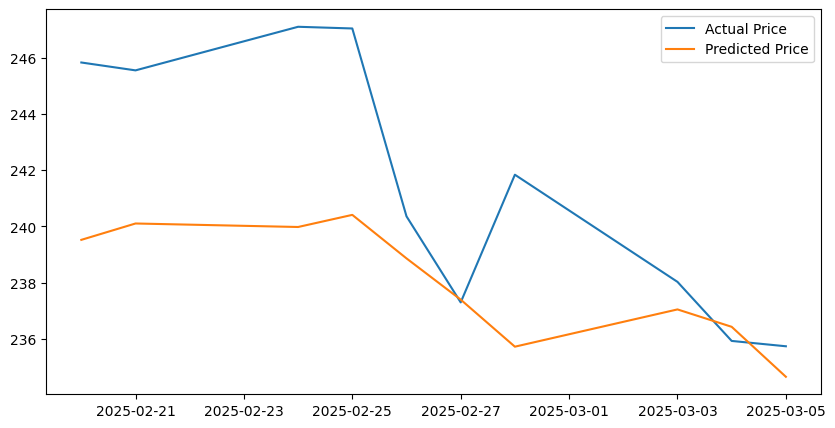

In [19]:
# Predict stock prices
predicted_stock_price = model.predict(X_dev)

# Convert back to original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualize predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(merged_df.iloc[31:] ["date"], scaler.inverse_transform(y_dev.reshape(-1, 1)), label="Actual Price")
plt.plot(merged_df.iloc[31:] ["date"], predicted_stock_price, label="Predicted Price")
plt.legend()
plt.show()
